In [1]:
import numpy as np
import  matplotlib.pyplot as plt
%matplotlib inline
import statsmodels
import statsmodels.api as sm
from statsmodels.graphics import tsaplots

In [2]:
min_interval_size = 100 # The smallest interval considered. If length of the interval is  <= 100, it is not splitted further
max_iter = 50000 # Maximum number of iterations for splitting


## Function to split to multiple intervals and compute ratio of eigen values

In [3]:
def process_time_series_all(s, min_eig_value):
    interval = (0, len(s))
    results = []
    splits_to_process = []
    num_iter = 0
    
    num_splits = 0
    
    eig_ratio = split_series(s[interval[0]:interval[1]])
    print("eig_ratio", eig_ratio)
#     if eig_ratio > min_eig_value:
#         results.append((eig_ratio, interval))
        
    if interval[1] - interval[0] > min_interval_size:
        mid = (interval[1] + interval[0]) // 2
        if eig_ratio < min_eig_value:
            print("Splitting further")
            splits_to_process.append([interval[0], mid])
            splits_to_process.append([mid, interval[1]])
            num_splits += 1
    eig_ratio = split_series(s[interval[0]:interval[1]])
    
    while len(splits_to_process)  > 0 and num_iter < max_iter:
        interval =  splits_to_process.pop()
        eig_ratio = split_series(s[interval[0]:interval[1]])
#        if eig_ratio > min_eig_value:
        results.append((eig_ratio, interval))
        if interval[1] - interval[0] > min_interval_size:
            mid = (interval[1] + interval[0]) // 2
            if eig_ratio < min_eig_value:
                splits_to_process.append([interval[0], mid])
                splits_to_process.append([mid, interval[1]])
                num_splits += 1
        num_iter = num_iter + 1
    
        
    return results, num_splits, num_iter
    


In [4]:
def split_series(series):
    #split into two, compute eigen value of each half, find the ratio of largest to smallest
    series = series - np.mean(series)
    # print("Mean of entire series", np.mean(series))
    if series.shape[0] % 2 == 0:
        # even
        series_1 = series[0:series.shape[0]//2]
        series_2 = series[series_1.shape[0]:]ss
    else:
        series_1 = series[0:series.shape[0]//2]
        series_2 = series[series_1.shape[0]:-1]
                    
    e1 = np.mean(series_1)
    e2 = np.mean(series_2)
    
    var1 = np.var(series_1)
    var2 = np.var(series_2)
    
    
  #  print("var1 converted to float",float(var1))
    zipped = []
    for i, j in zip(series_1, series_2):
        zipped.append([i,j])
    
    cov = np.cov(np.transpose(np.asarray(zipped)))
    e1,_ = np.linalg.eig(np.asarray(cov))
    
    eig_ratio = max(e1) / min(e1)
    return eig_ratio


In [5]:
def process_time_series(s, min_eig_value):
    interval = (0, len(s))
    results = []
    splits_to_process = []
    num_iter = 0
    
    eig_ratio = split_series(s[interval[0]:interval[1]])
    print("eig_ratio", eig_ratio)
    
    if eig_ratio > min_eig_value:
        results.append((eig_ratio, interval))
        
    if interval[1] - interval[0] > min_interval_size:
        mid = (interval[1] + interval[0]) // 2
        if eig_ratio < min_eig_value:
            splits_to_process.append([interval[0], mid])
            splits_to_process.append([mid, interval[1]])
    eig_ratio = split_series(s[interval[0]:interval[1]])
    while len(splits_to_process)  > 0 and num_iter < max_iter:
        #print("Inside the loop", eig_ratio, splits_to_process)
        interval =  splits_to_process.pop()
        eig_ratio = split_series(s[interval[0]:interval[1]])
        if eig_ratio > min_eig_value:
            results.append((eig_ratio, interval))
        if interval[1] - interval[0] > min_interval_size:
            mid = (interval[1] + interval[0]) // 2
            if eig_ratio < min_eig_value:
                splits_to_process.append([interval[0], mid])
                splits_to_process.append([mid, interval[1]])
        num_iter = num_iter + 1
    
#     if len(result) == 0:
        
        
    return results
    


In [6]:
def plot_eigen_ratio(data, results, max_value, fname, title, y_scale=None):
    result_step = np.zeros(max_value)
    for r in results:
        result_step[r[1][0]: r[1][1]] = r[0]
    plt.figure(figsize=(20, 10))
    
    
    plt.subplot(211)
    plt.plot(result_step)
    if y_scale is not None:
        plt.ylim(y_scale)
    
    plt.ylabel("Ratio of Eigen Value -Largest to Smallest")
    
    plt.title(title)
    plt.subplot(212)
    plt.plot(data)


    plt.savefig(fname)

In [7]:
def area_per_unit_length(results, max_value):
    result = 0
    for r in results:
        result += (r[1][1] - r[1][0]) * r[0]
    result /= max_value
    return result

## Function to compute min, max, variance are per unit lenght, number of plits

In [8]:
import statistics 
def print_results(data_name, results, max_value, num_splits):
    min_eig_ratio = min([r[0] for r in results])
    max_eig_ratio = max([r[0] for r in results])
    var_eig_ratio = statistics.variance([r[0] for r in results])
    area = area_per_unit_length(results, max_value)
    print(f"***********{data_name}***********")
    print("Minimum Eigen Ratio", min_eig_ratio)
    print("Maximum Eigen Ratio", max_eig_ratio)
    print("Variance of  Eigen", var_eig_ratio)
    print("Area of eig_ratio", area)
    print("Number of splits", num_splits)


# Lorenz
## Read data

In [16]:
import os

In [17]:
min_eigen_value = 10

In [52]:
file_name = "lorenz_data"
if os.path.isfile(file_name):
    files = [file_name]
else:
    files = os.listdir(file_name)
    
data_dict = {}
for file in files:
    with open(file_name +"/"+file,"r") as fp:
        text= fp.readlines()
    data_dict[file] = np.asarray([float(d) for d in text])
    max_value_lorenz = len(data_dict[file])
    print(f"Number of samples in {file} {max_value_lorenz}")

Number of samples in lorenz.dat 16384
Number of samples in sac_ascf_phi 33124
Number of samples in sac_ascf_gamma 33269
Number of samples in sac_ascf_delta 34051
Number of samples in sac_ascf_kai 18801
Number of samples in lordata.dat 15998
Number of samples in sac_ascf_beta 30124
Number of samples in sac_ascf_theta 30881
Number of samples in sac_ascf_lambda 33079
Number of samples in sac_ascf_kappa 33446


In [53]:
def compute_svd(M, tau, max_num_samples_to_take, lorenz ):
    num_samples_to_take = min(lorenz.shape[0] - M * tau, max_num_samples_to_take)
    
    shifted_for_svd = []
    shifted_for_svd = np.zeros((M, num_samples_to_take))
    for i in range(M):
        shifted_for_svd[i] = lorenz[ i * tau:][0:num_samples_to_take]
    shifted_for_svd = np.asarray(shifted_for_svd)
#     print(shifted_for_svd.shape)
    
#     print(len(shifted_for_svd[0]))
    svd = np.linalg.svd(shifted_for_svd)
    return svd


In [54]:
print(files)

['lorenz.dat', 'sac_ascf_phi', 'sac_ascf_gamma', 'sac_ascf_delta', 'sac_ascf_kai', 'lordata.dat', 'sac_ascf_beta', 'sac_ascf_theta', 'sac_ascf_lambda', 'sac_ascf_kappa']


## Plot intervals for which eigen_ratio > min_eigen_value

eig_ratio 1.3431781267931022
Splitting further
eig_ratio 1.5750665967091055
Splitting further
eig_ratio 1.1739187876667239
Splitting further
eig_ratio 1.481215545140972
Splitting further
eig_ratio 1.0411923454801995
Splitting further
eig_ratio 1.0077480529188452
Splitting further
eig_ratio 1.5037660173176937
Splitting further
eig_ratio 1.4854915695631687
Splitting further
eig_ratio 1.700076271318647
Splitting further
eig_ratio 1.078110183110922
Splitting further


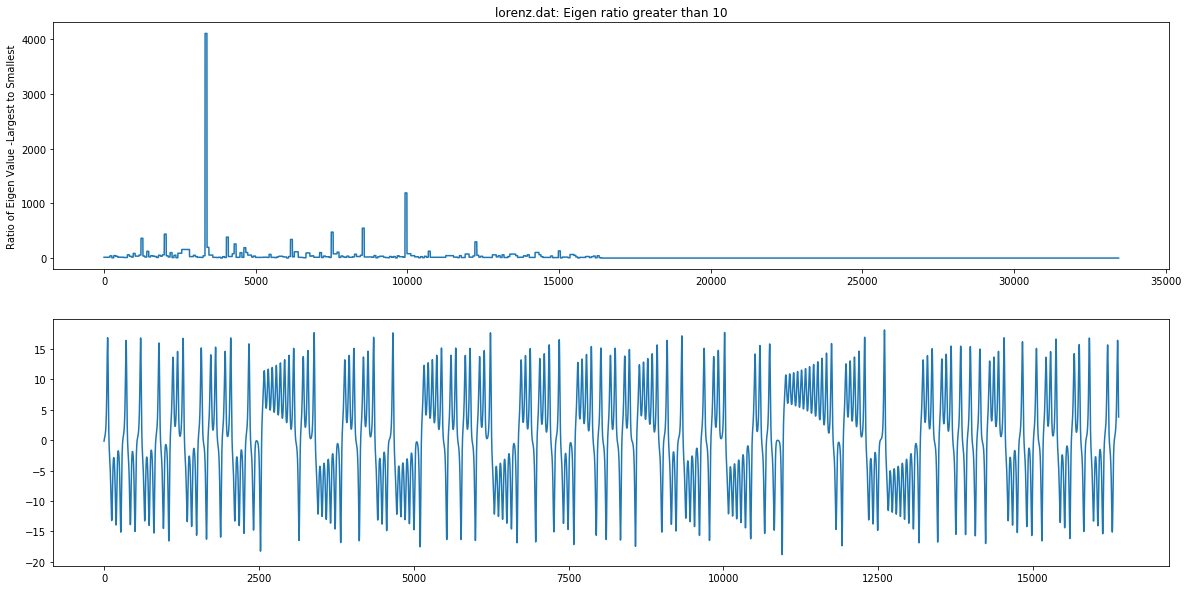

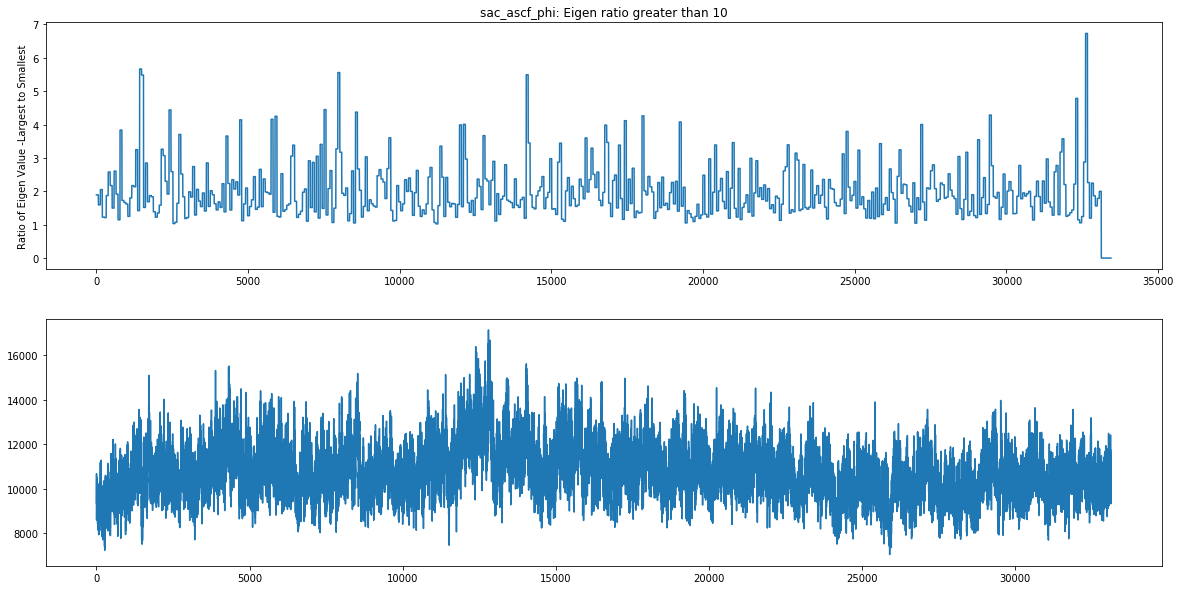

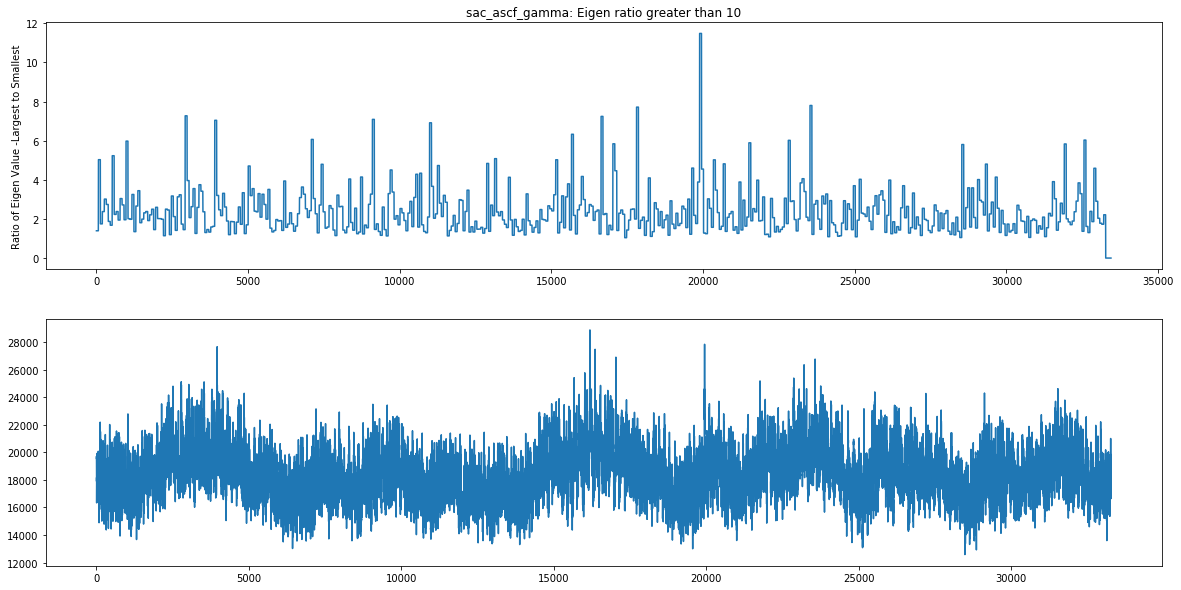

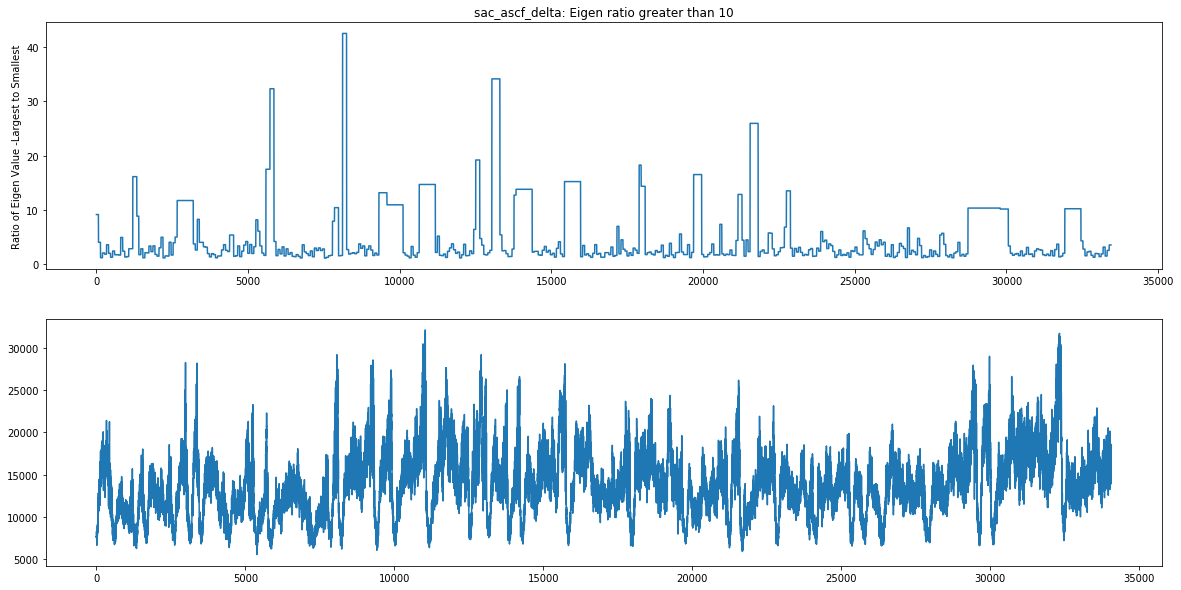

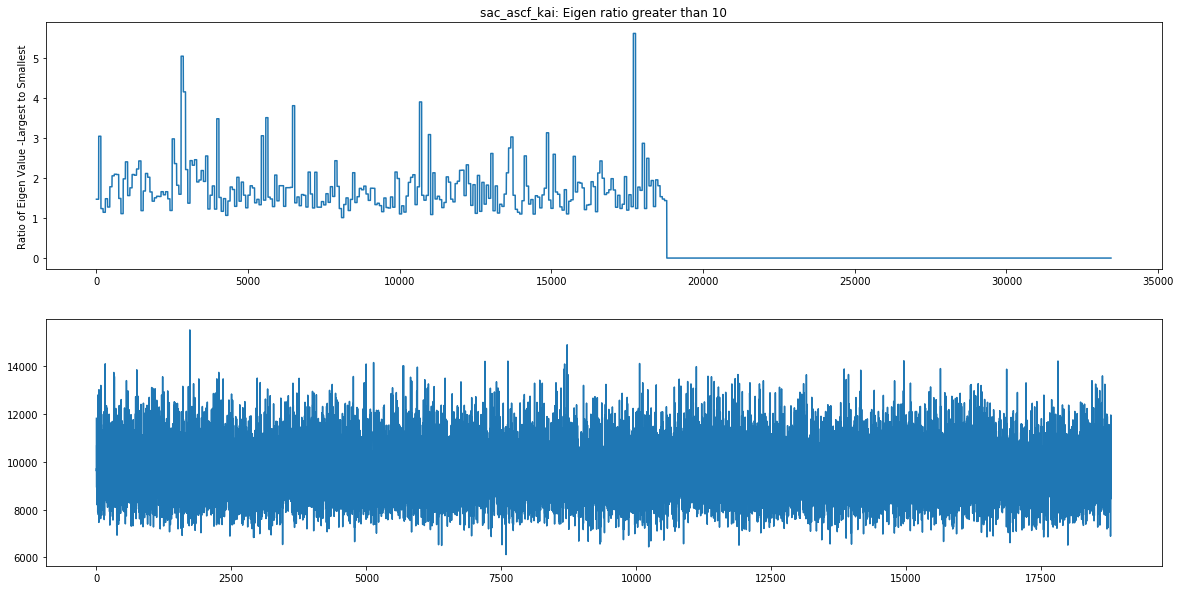

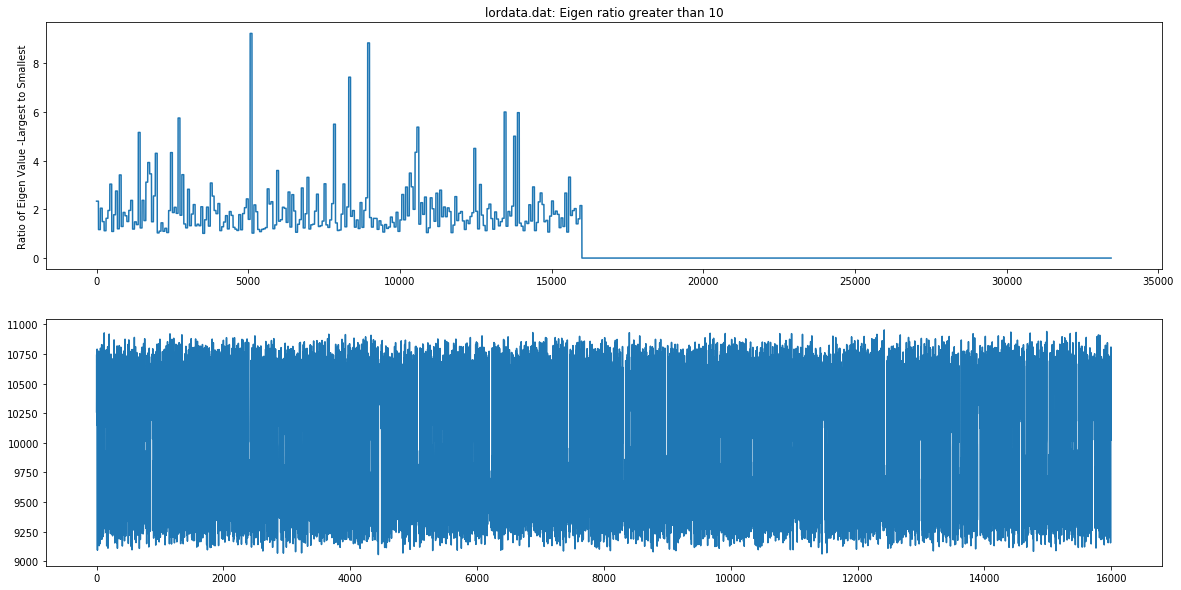

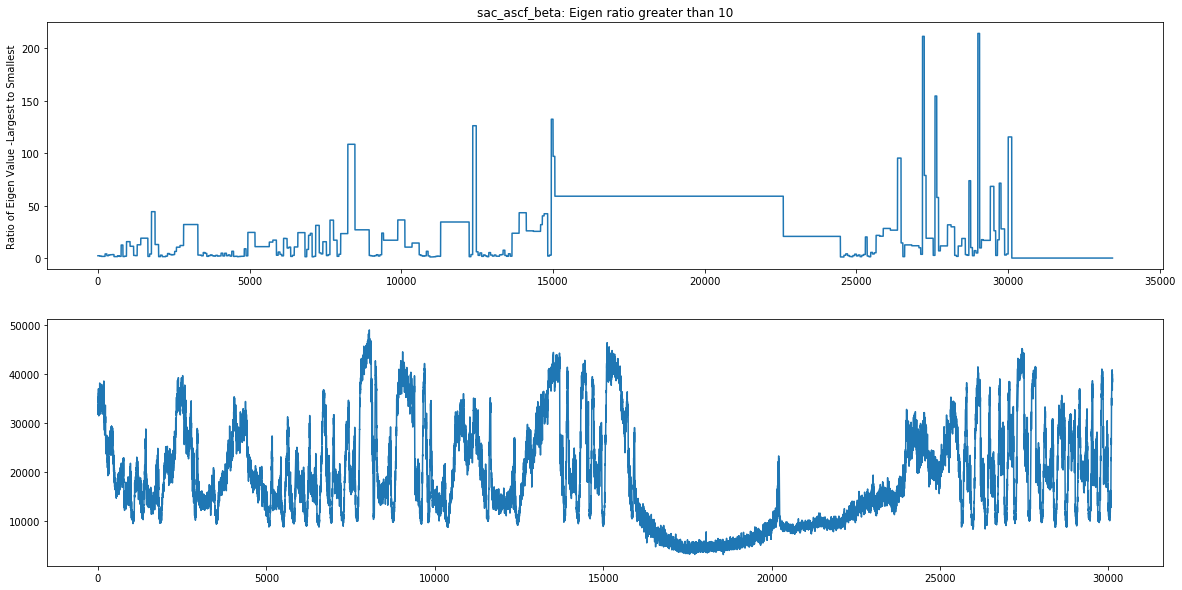

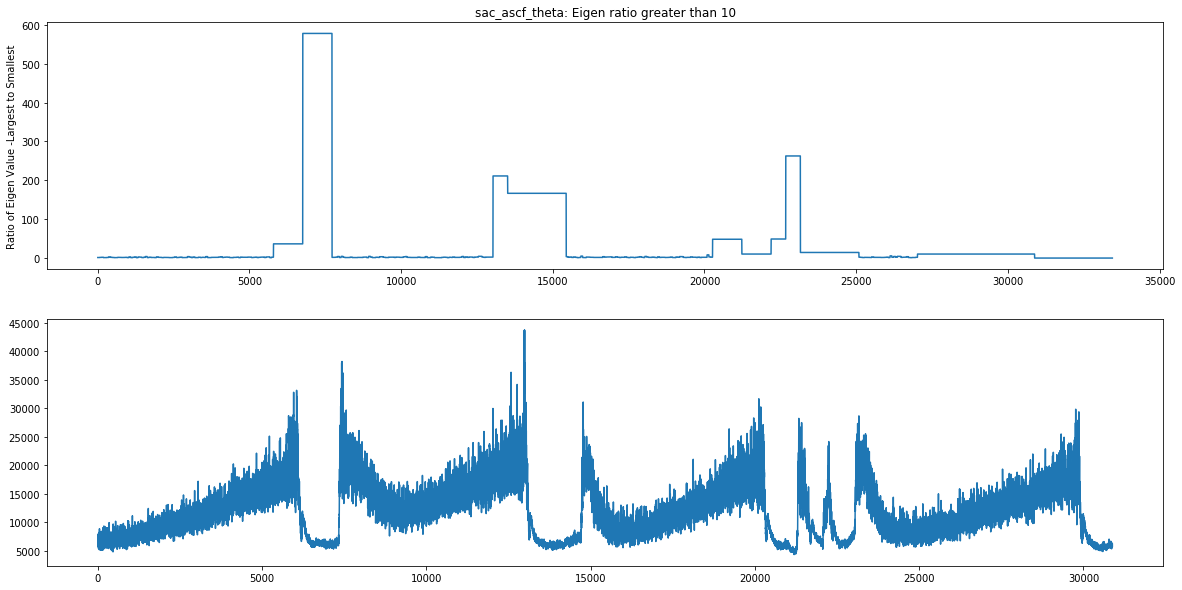

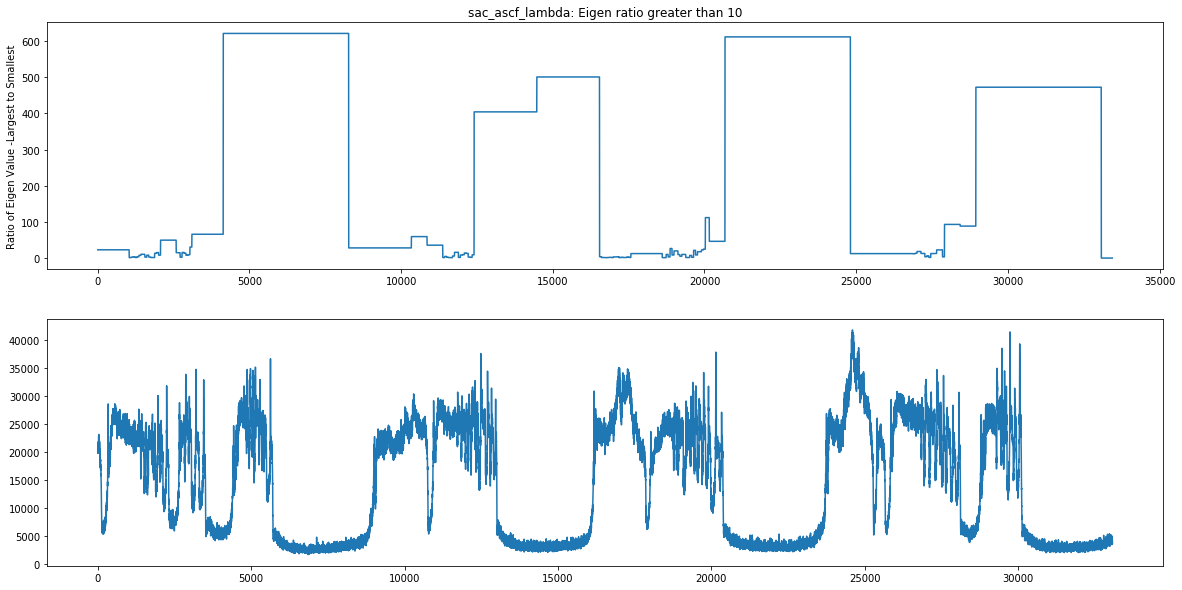

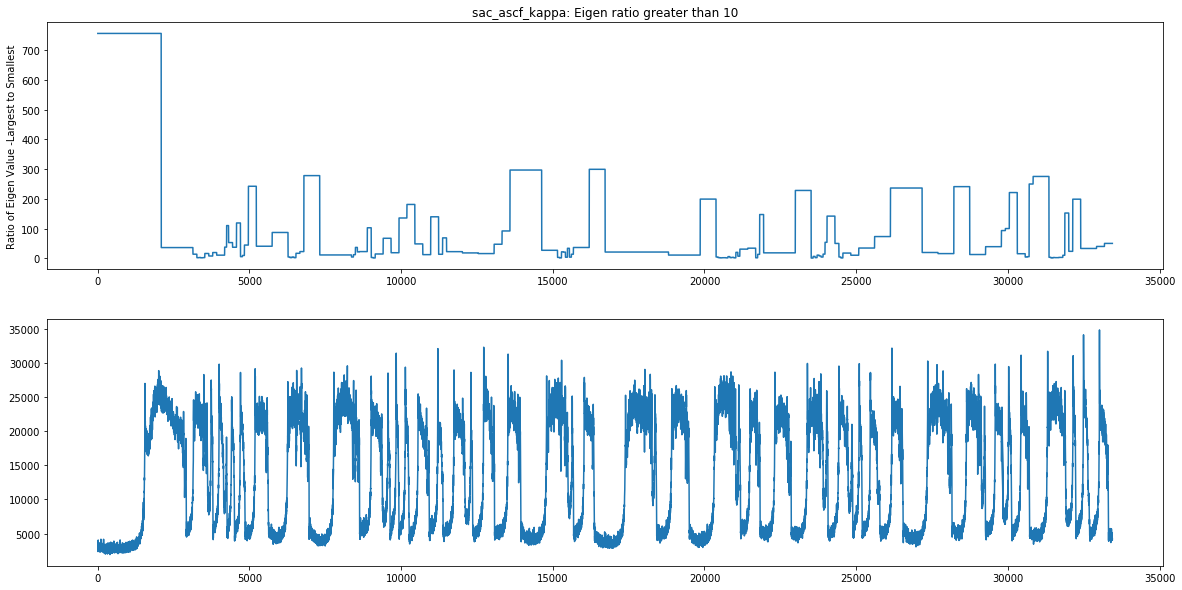

In [55]:
for file_name in data_dict.keys():
    results, num_splits, num_iters = process_time_series_all(np.asarray(data_dict[file_name]), min_eigen_value)
    plot_eigen_ratio(data_dict[file_name], results, max_value_lorenz, f"{file_name}.jpg", title=f"{file_name}: Eigen ratio greater than {min_eigen_value}")

# plt.plot([r[0] for r in results])

In [56]:
for file_name in data_dict.keys():
    print_results(file_name, results, max_value_lorenz, num_splits)

***********lorenz.dat***********
Minimum Eigen Ratio 1.0361504499001704
Maximum Eigen Ratio 755.882998681802
Variance of  Eigen 5199.703211004899
Area of eig_ratio 133.4606157673224
Number of splits 132
***********sac_ascf_phi***********
Minimum Eigen Ratio 1.0361504499001704
Maximum Eigen Ratio 755.882998681802
Variance of  Eigen 5199.703211004899
Area of eig_ratio 133.4606157673224
Number of splits 132
***********sac_ascf_gamma***********
Minimum Eigen Ratio 1.0361504499001704
Maximum Eigen Ratio 755.882998681802
Variance of  Eigen 5199.703211004899
Area of eig_ratio 133.4606157673224
Number of splits 132
***********sac_ascf_delta***********
Minimum Eigen Ratio 1.0361504499001704
Maximum Eigen Ratio 755.882998681802
Variance of  Eigen 5199.703211004899
Area of eig_ratio 133.4606157673224
Number of splits 132
***********sac_ascf_kai***********
Minimum Eigen Ratio 1.0361504499001704
Maximum Eigen Ratio 755.882998681802
Variance of  Eigen 5199.703211004899
Area of eig_ratio 133.46061576

# Auto correlation

In [57]:
# acm = sm.tsa.acf(lorenz, nlags=300)
# # fig = tsaplots.plot_acf(lorenz, lags=300)
# plt.plot(acm)

# Auto correlation Log scale

In [58]:
# fig = tsaplots.plot_acf(lorenz, lags=300)
#plt.plot(np.log(acm))

## Power Spectrum

In [59]:
# ps = np.abs(np.fft.fft(lorenz))**2
# plt.plot(np.log(ps[0:3000]))

## Plot x Vs x + tau

In [60]:
num_samples_to_plot = 5000

In [61]:
tau = 200

In [62]:
#for file_name in data_dict.keys():
#    lorenz = np.asarray(data_dict[file_name])
    # PLot x(t) vs x(t+ tau)
#    shifted = daa_dict[file_name[tau:]]
#     plt.plot(daa_dict[file_name[tau:][0:num_samples_to_plot], shifted[0:num_samples_to_plot])
#     plt.savefig("x_vs_x_tau.jpg")
#     plt.xlabel("X")
#     plt.ylabel(f"X+{tau}")


## Create matrix with each row shifted by tau and factorize using SVD
M - Number of rows in matrix shifted_for_svd

tau - number of samples by which successive rows are shifted

# M = 2

## Plot 2nd largest eigen vector vs largest eigen vector

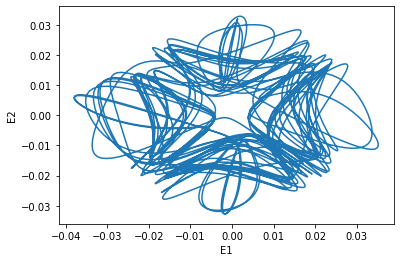

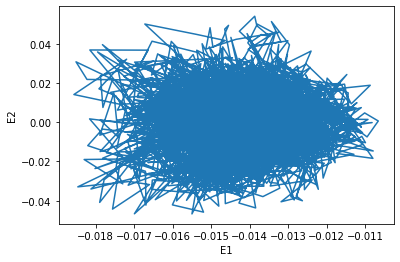

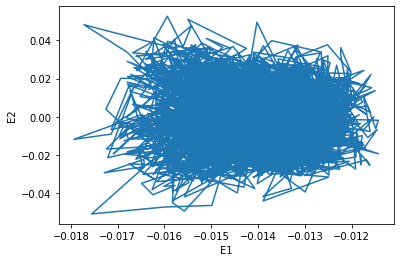

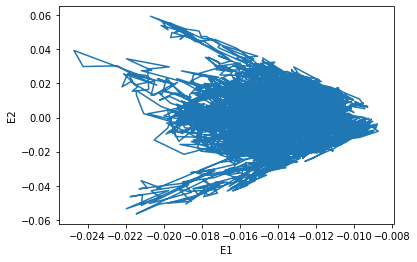

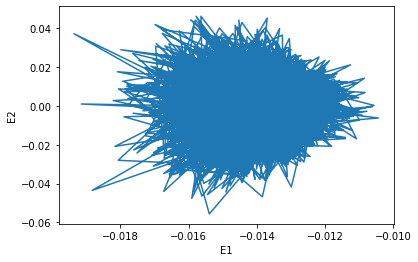

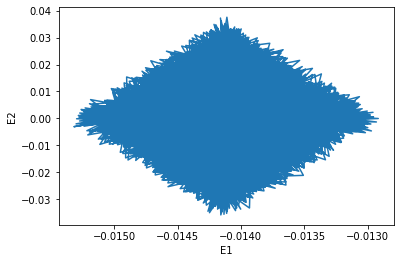

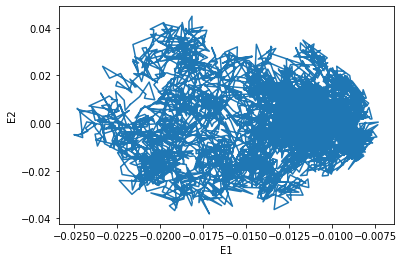

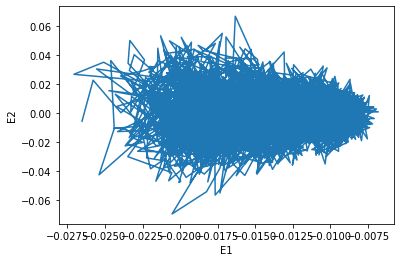

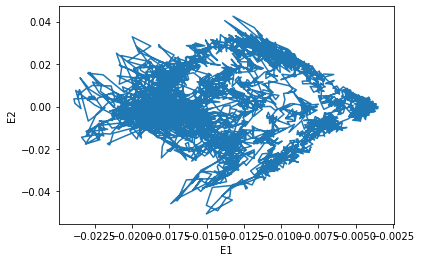

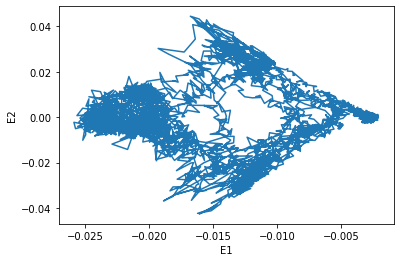

In [64]:
M = 2
for file_name in data_dict.keys():
    svd = compute_svd(M, tau, max_num_samples_to_take, data_dict[file_name])
    v_mat = svd[2]
    plt.figure()
    plt.plot(v_mat[0], v_mat[1])
    plt.xlabel("E1")
    plt.ylabel("E2")
    plt.savefig(f"file_name_e1_vs_e2_m_2.jpg")


# M = 3

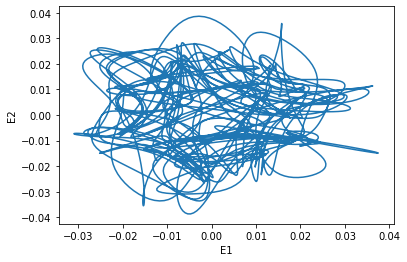

In [75]:
# SVD
M=3
max_num_samples_to_take = 5000

svd = compute_svd(M, tau, max_num_samples_to_take, lorenz)
v_mat = svd[2]


plt.plot(v_mat[0], v_mat[1])
plt.xlabel("E1")
plt.ylabel("E2")
plt.savefig("e1_vs_e2_m_3.jpg")


In [76]:
lorenz.shape

(16384,)

# M = 70

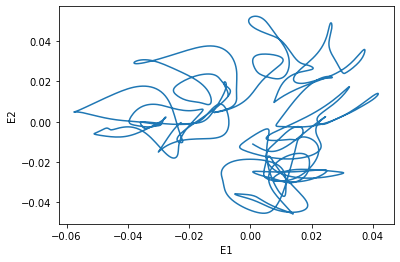

In [77]:
# SVD
M = 70
num_samples_to_take = 2000

svd = compute_svd(M, tau, num_samples_to_take, lorenz)
v_mat = svd[2]

plt.plot(v_mat[0], v_mat[1])
plt.xlabel("E1")
plt.ylabel("E2")
plt.savefig("e1_vs_e2_m_4.jpg")

In [78]:
M_array = np.arange(10, 100, 10)
tau_array = np.arange(20, 200, 20)
print("M", M_array)
print("tau", tau_array)

M [10 20 30 40 50 60 70 80 90]
tau [ 20  40  60  80 100 120 140 160 180]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained

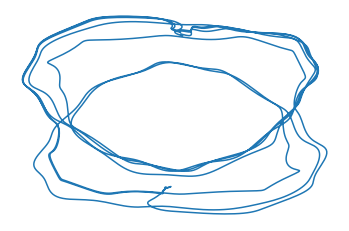

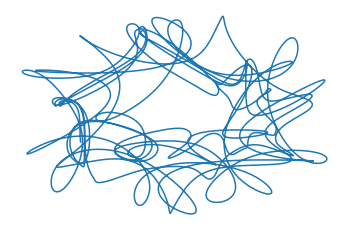

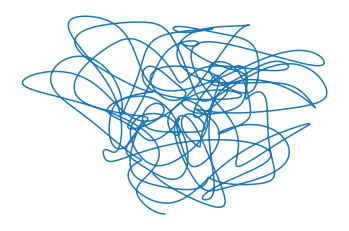

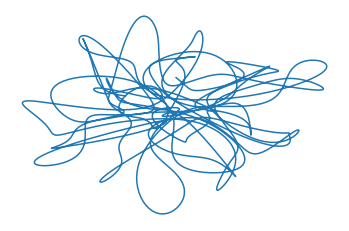

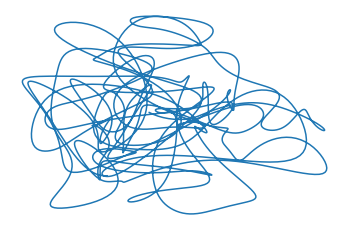

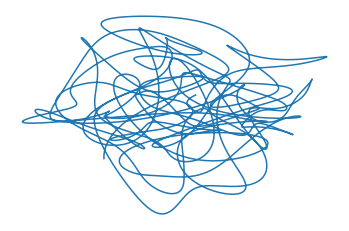

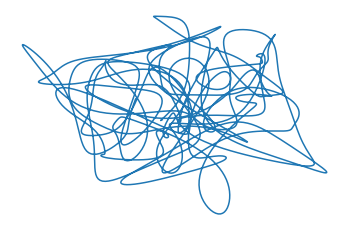

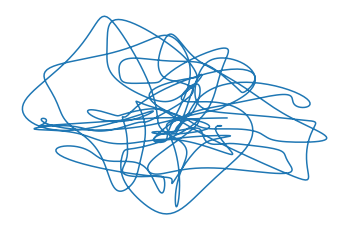

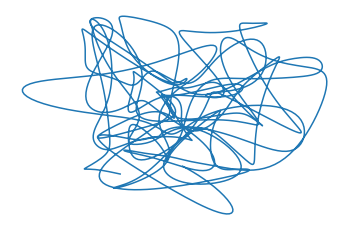

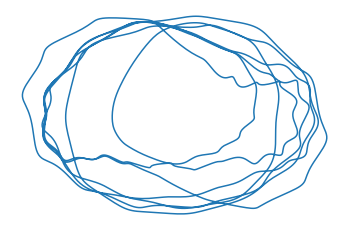

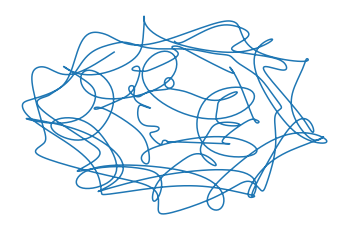

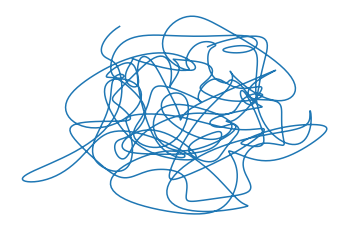

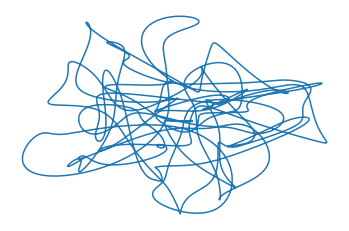

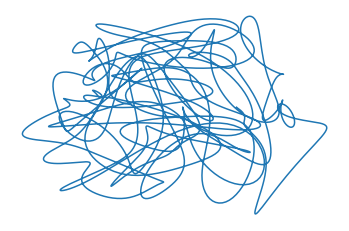

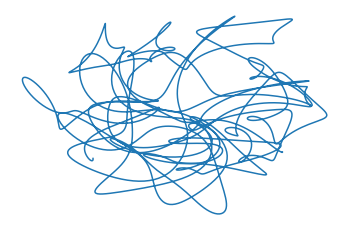

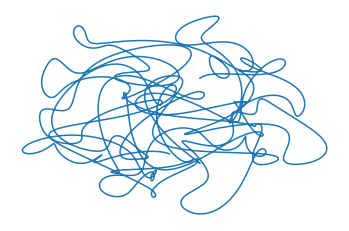

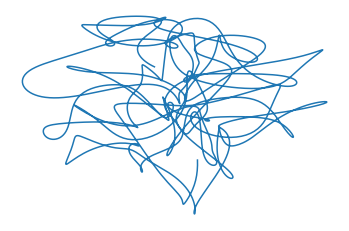

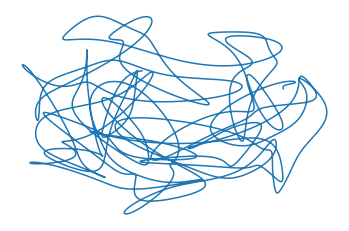

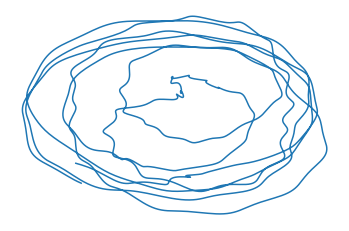

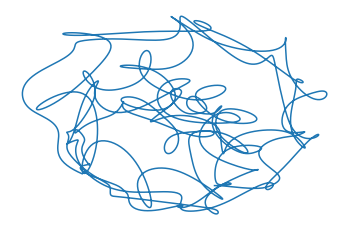

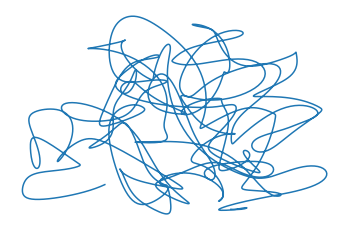

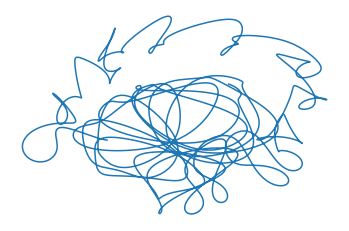

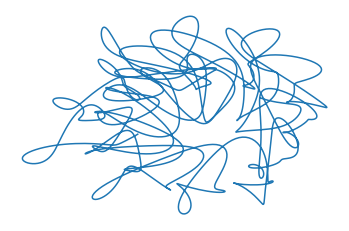

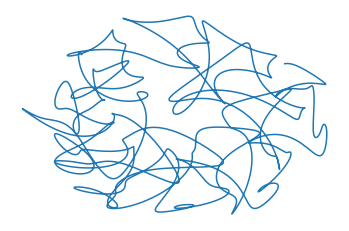

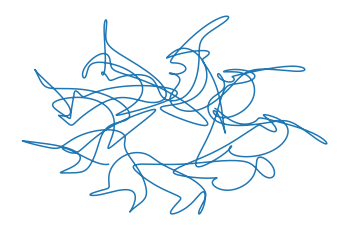

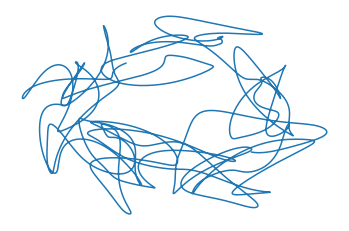

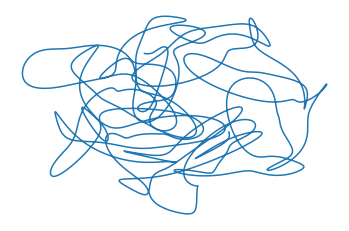

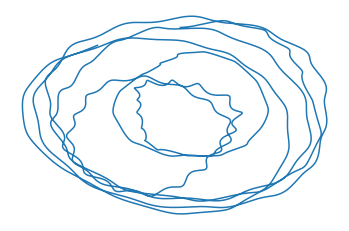

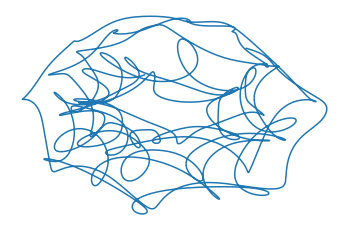

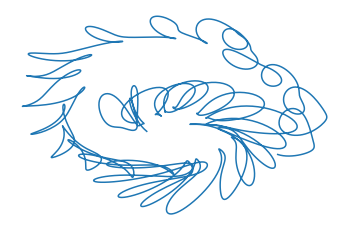

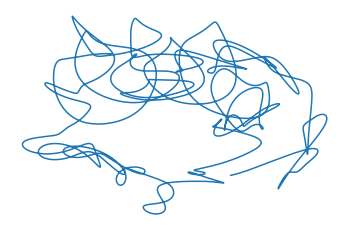

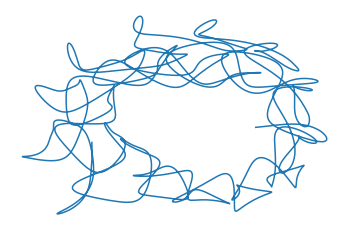

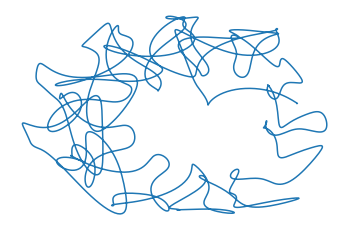

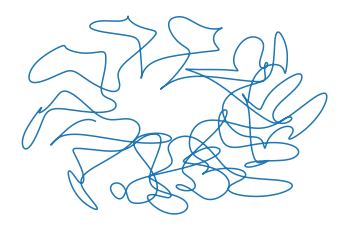

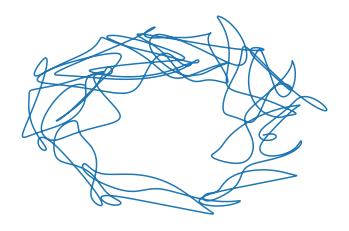

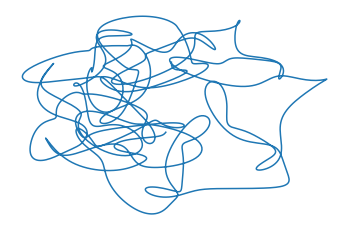

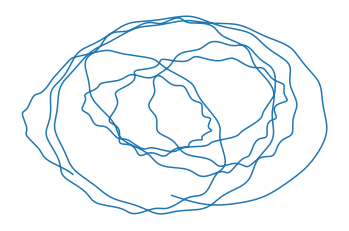

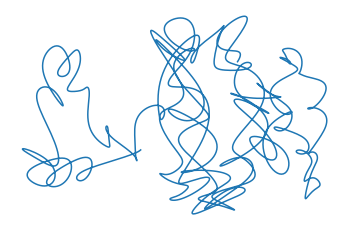

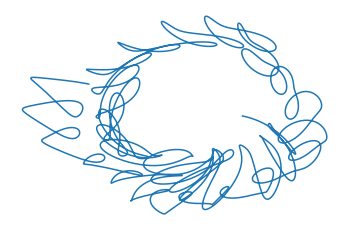

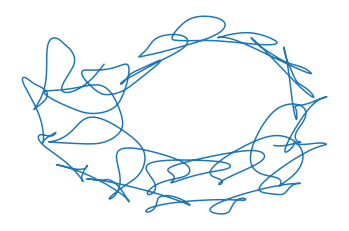

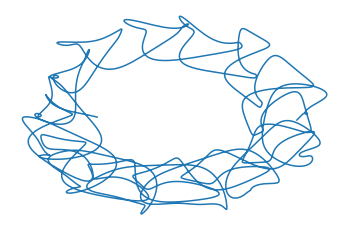

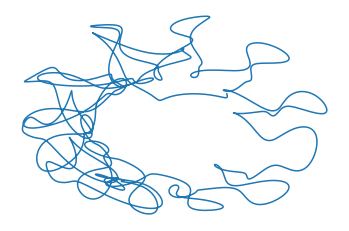

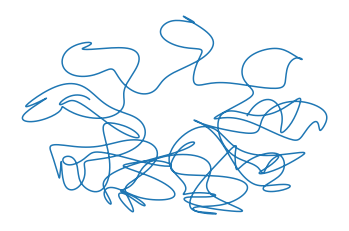

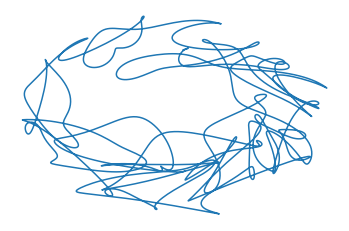

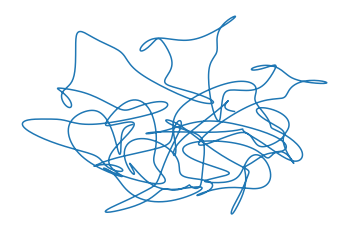

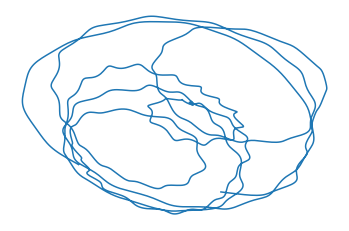

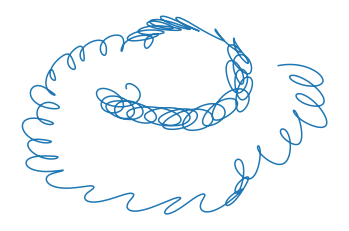

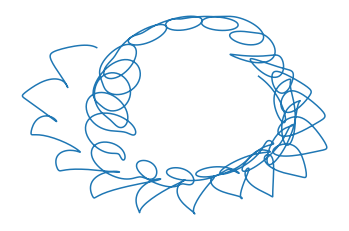

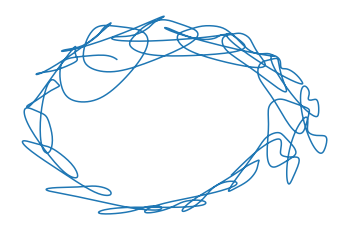

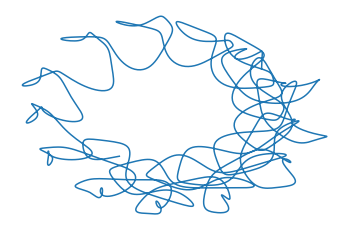

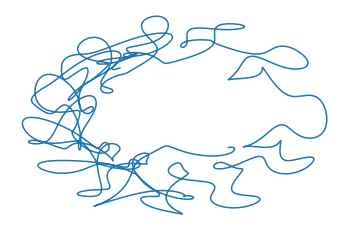

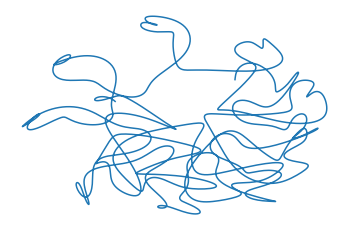

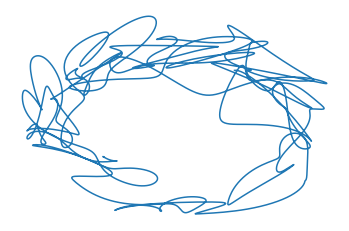

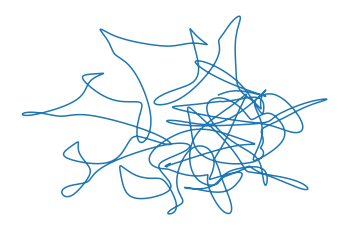

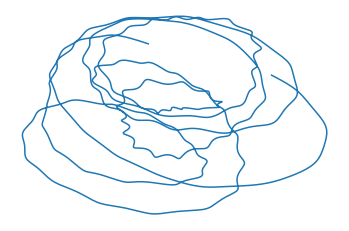

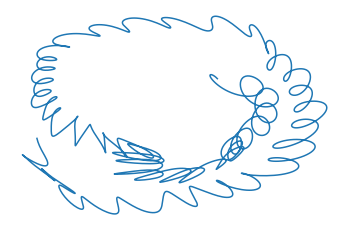

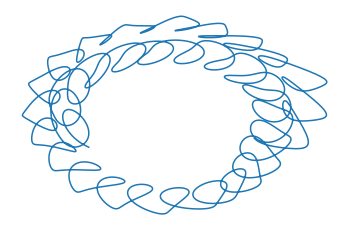

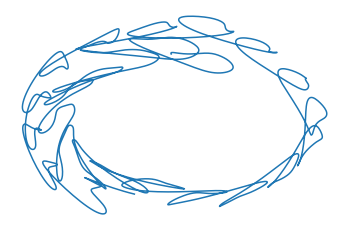

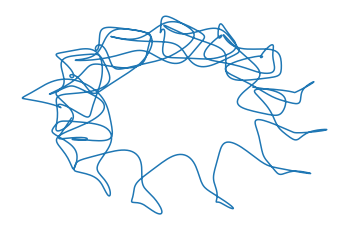

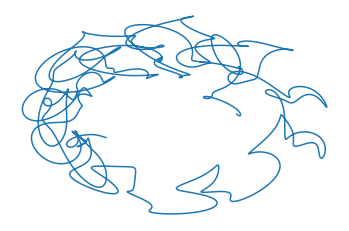

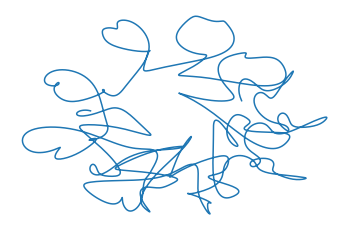

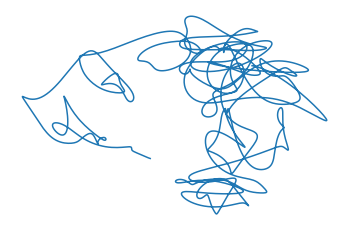

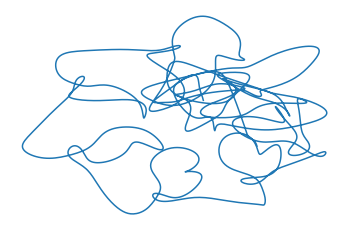

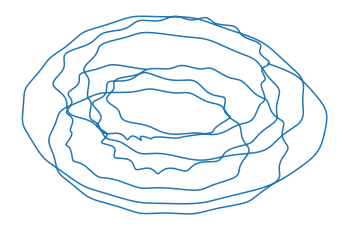

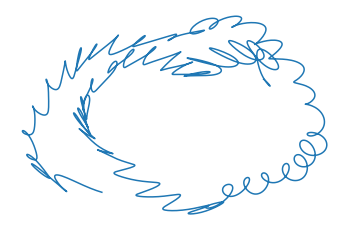

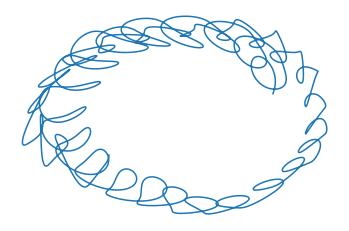

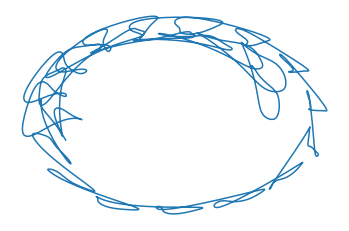

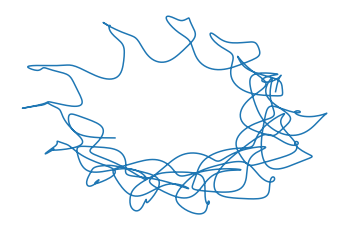

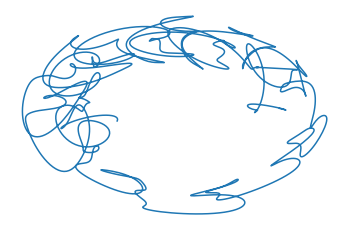

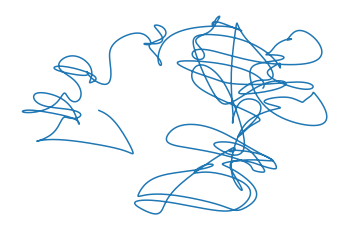

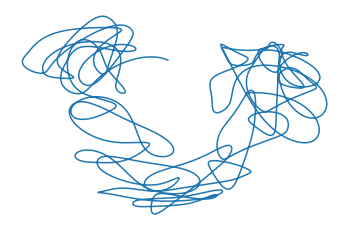

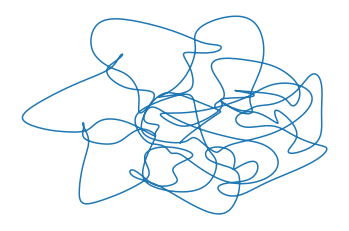

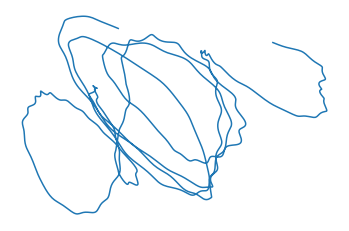

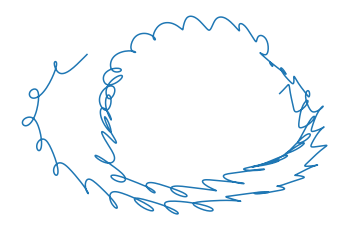

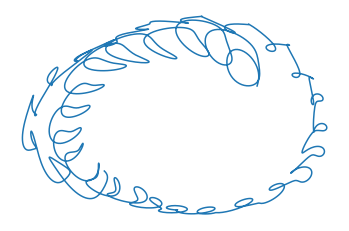

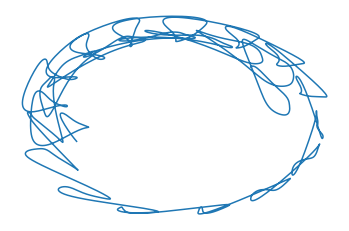

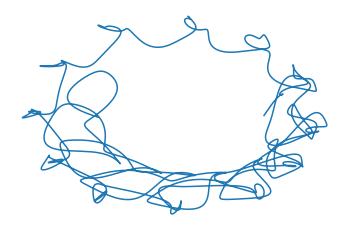

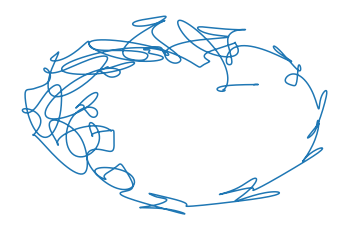

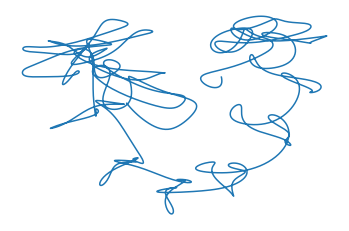

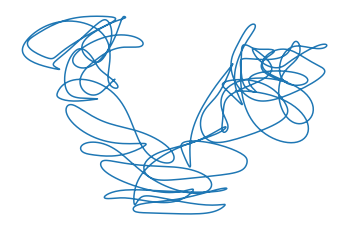

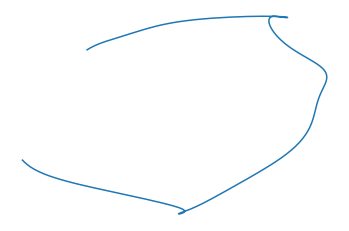

In [79]:
for M in M_array:
    for tau in tau_array:
        svd = compute_svd(M, tau, num_samples_to_take, lorenz)
        v_mat = svd[2]
        fig = plt.figure()
        plt.plot(v_mat[0][0:100], v_mat[1][0:100])
        plt.xlabel("E1")
        plt.ylabel("E2")
#        plt.title( f"M={M}  tau={tau}")
        plt.axis("off")
        plt.savefig(f"e1_vs_e2_{M}_{tau}.jpg")
